<div style="text-align: center"> <h1>Exp.7.4 Scientific Computing using Scikit Learn – k-Means Clustering</h1></div>

**Aim:**

To perform prediction of iris data using K-means Clustering using Sklearn python library

**Procedure:**

Step 1: Import the library in the session with an alias by typing ‘import Sklearn’,’import train_test_split’,KMeans, accuracy_score from sklearn.

Step 2: Load iris dataset into iris using load_iris().

Step 3: Create a K-means Clustering model using k-Means.

Step 4: Fit the classifier to the training data using Fit the k-Means (kmeans.fit) object to the data.

Step 5: Visualize the reduced data using the Scatter plot function.

### Introduction

K-Means is an unsupervised machine learning algorithm used for clustering. The Iris Dataset is a very well-known dataset used to predict the Iris flower species based on a few given properties. 

### What is K-Means ?

K-Means is an unsupervised machine learning algorithm that is used for clustering problems. Since it is an unsupervised machine learning algorithm, it uses unlabelled data to make predictions.

 

K-Means is nothing but a clustering technique that analyzes the mean distance of the unlabelled data points and then helps to cluster the same into specific groups. 

 

In detail, K-Means divides unlabelled data points into specific clusters/groups of points. As a result, each data point belongs to only one cluster that has similar properties.


K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

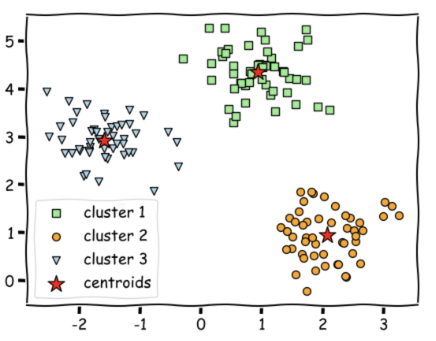

### K-Means Algorithm

The various steps involved in K-Means are as follows:-

* Choose the 'K' value where 'K' refers to the number of clusters or groups. 

* Randomly initialize 'K' centroids as each cluster will have one center. So, for example, if we have 7 clusters, we would initialize seven centroids.

* Now, compute the euclidian distance of each current data point to all the cluster centers. Based on this, assign each data point to its nearest cluster. This is known as the 'E- Step.' 

***Example:*** Let us assume we have two points, A1(X1, Y1) and B2(X2, Y2). Then the euclidian distance between the two points would be the following:-

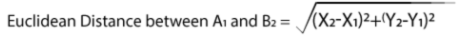


* Now, update the cluster center locations by taking the mean of the data points assigned. This is known as the 'M-Step.'

* Repeat the above two steps until convergence, i.e., until we reach a global optimum where no further optimization is possible.


### Importing Necessary Libraries
* Numpy - for linear algebra. 

* Pandas - for data analysis. 

* Seaborn - for data visualization.

* Matplotlib - for data visualisation. 

* KMeans - for using K-Means.

* LabelEncoder - for label encoding. 

* classification_report - for generating numerous results.

* accuracy_score - for generating model accuracy. 
    

## Program

In [1]:
import wget
import numpy as np
import pandas as pd
import sklearn.metrics 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

### Load the Iris dataset

In [2]:
path_to_data ='C:/Users/St.Josephs/Documents/PythonCode Test/iris.csv'
path_to_data

'C:/Users/St.Josephs/Documents/PythonCode Test/iris.csv'

In [3]:
iris = pd.read_csv(path_to_data)


### Visualization

In [4]:
#visualizing dataset
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
#finding different class labels 
np.unique(iris['variety'])

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [6]:
#To know the data types of the variables.
iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [7]:
# the count of each class we use value_counts()
iris['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [8]:
# tha shape of Dataset
iris.shape

(150, 5)

In [9]:
# the information about Dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Text(0.5, 1.0, 'Scatter Plot')

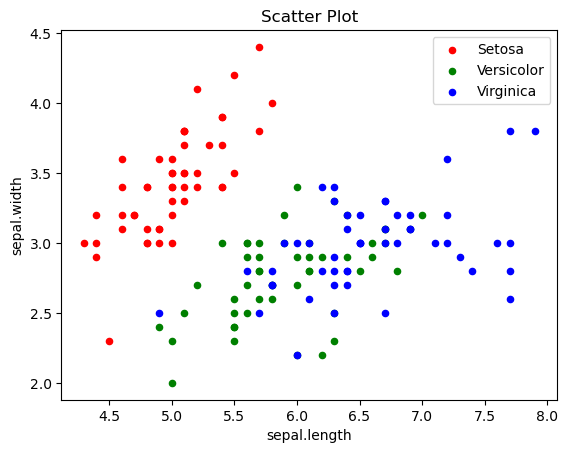

In [10]:
# Matplotlib for a scatter plot. 
ax = iris[iris.variety=='Setosa'].plot.scatter(x='sepal.length', y='sepal.width', 
                                                    color='red', label='Setosa')
iris[iris.variety=='Versicolor'].plot.scatter(x='sepal.length', y='sepal.width', 
                                                color='green', label='Versicolor', ax=ax)
iris[iris.variety=='Virginica'].plot.scatter(x='sepal.length', y='sepal.width', 
                                                color='blue', label='Virginica', ax=ax)
ax.set_title("Scatter Plot")

Text(0.5, 1.0, 'Scatter Plot')

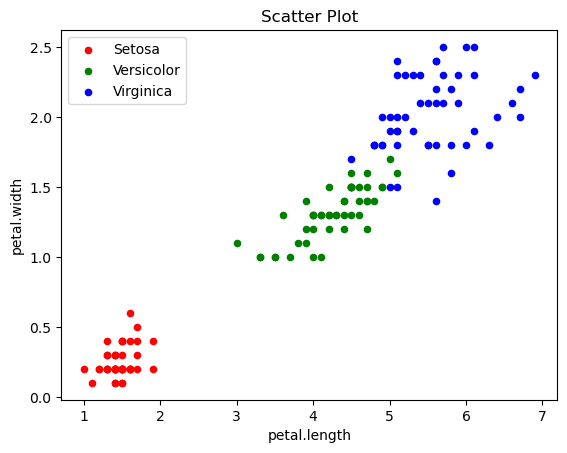

In [11]:
# Matplotlib for a scatter plot petal.length vs petal.width. 
ax = iris[iris.variety=='Setosa'].plot.scatter(x='petal.length', y='petal.width', 
                                                    color='red', label='Setosa')
iris[iris.variety=='Versicolor'].plot.scatter(x='petal.length', y='petal.width', 
                                                color='green', label='Versicolor', ax=ax)
iris[iris.variety=='Virginica'].plot.scatter(x='petal.length', y='petal.width', 
                                                color='blue', label='Virginica', ax=ax)
ax.set_title("Scatter Plot")

### Preprocessing

### Data imputation

In [12]:
#checking for Null values
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

### Label Encoding

label encoding for converting the categorical feature **‘variety’** into a numerical one.

In [13]:
encoder = LabelEncoder()
iris['variety'] = encoder.fit_transform(iris['variety'])

In [14]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
#finding different class labels 
np.unique(iris['variety'])

array([0, 1, 2])

### Insignificant Features

In [16]:
# DROPPING target 
X = iris.drop(['variety'], axis=1)
y = iris['variety']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


### Implementing K-Means Clustering

In [17]:
kmeans = KMeans(n_clusters = 4)

In [18]:
#y_kmeans = kmeans.fit_predict(X)
y_kmeans = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0])

In [25]:
x = iris.iloc[:, [0, 1, 2, 3]].values

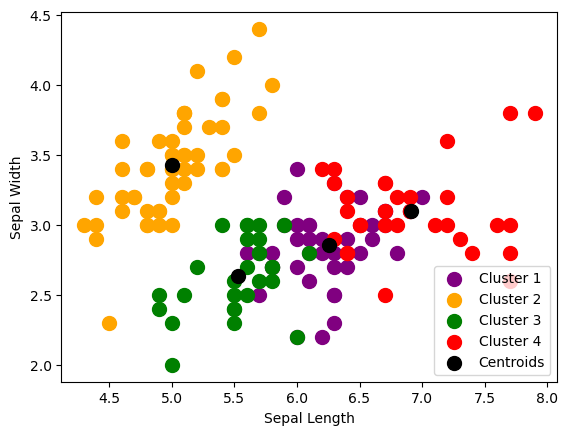

In [26]:
#Visualising the clusters for Sepal Length vs Sepal Width
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

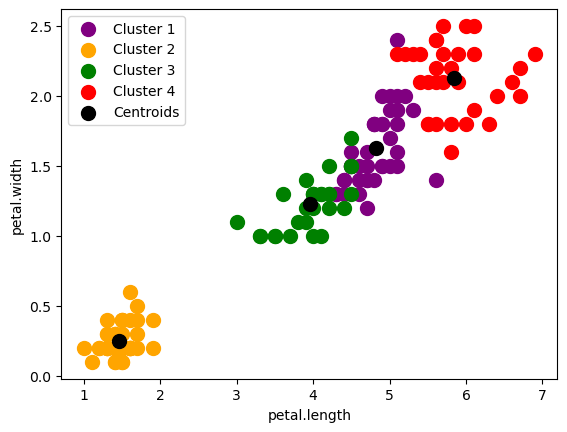

In [27]:
#Visualising the clusters for petal.length vs petal.width
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 2], x[y_kmeans == 3, 3], s = 100, c = 'red', label = 'Cluster 4')
plt.xlabel('petal.length')
plt.ylabel('petal.width')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'black', label = 'Centroids')

plt.legend()

**Result:**
    
Thus, the prediction of iris data using K-means Clustering using the Sklearn python library was implemented successfully.